In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

**- Загрузка данных**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Присвоим переменной «url» ссылку на датасет:

url = '/content/drive/MyDrive/Analysis/lab2/Student.csv'
dataset = pd.read_csv(url)
dataset = dataset.drop(['Age'], axis=1)
dataset = dataset.drop(['Study Hours'], axis=1)


- **Анализ данных**

In [ ]:
# отображаем первые 10 сстрок датасета

dataset.head(10)

,Gender,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Financial Stress,Family History of Mental Illness,Depression,mmAge,mmStudyH
0,1.0,2.0,4.0,1.0,1.0,1.0,2,1.0,0.0,0.6250,0.750000
1,1.0,4.0,5.0,0.0,0.0,1.0,1,1.0,0.0,0.6250,0.583333
2,1.0,1.0,3.0,0.0,2.0,1.0,4,0.0,1.0,0.4375,0.833333
3,1.0,1.0,4.0,3.0,2.0,1.0,2,1.0,0.0,0.3125,0.583333
4,0.0,1.0,5.0,3.0,0.0,1.0,2,1.0,0.0,0.8125,0.333333
5,1.0,4.0,4.0,0.0,2.0,1.0,4,1.0,1.0,0.0625,0.083333
6,0.0,4.0,2.0,3.0,1.0,1.0,2,0.0,1.0,1.0000,0.500000
7,0.0,4.0,1.0,3.0,0.0,1.0,4,1.0,1.0,0.1250,0.250000
8,0.0,1.0,4.0,3.0,1.0,0.0,3,0.0,0.0,0.9375,0.833333
9,1.0,4.0,3.0,2.0,2.0,1.0,1,0.0,1.0,0.9375,0.833333


In [ ]:
# размер датасета, 502 записей, 13 столбцов

dataset.shape

(502, 11)

In [ ]:
import mpl_toolkits.mplot3d  # noqa: F401


from sklearn import datasets
from sklearn.cluster import KMeans

In [ ]:
# Метод Pandas info()  выводит очень много информации о наборе данных - количество записей,
# количество ненулевых значений в каждом столбце, тип данных в столбце

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    float64
 1   Academic Pressure                      502 non-null    float64
 2   Study Satisfaction                     502 non-null    float64
 3   Sleep Duration                         502 non-null    float64
 4   Dietary Habits                         502 non-null    float64
 5   Have you ever had suicidal thoughts ?  502 non-null    float64
 6   Financial Stress                       502 non-null    int64  
 7   Family History of Mental Illness       502 non-null    float64
 8   Depression                             502 non-null    float64
 9   mmAge                                  502 non-null    float64
 10  mmStudyH                               502 non-null    float64
dtypes: flo

In [ ]:
# Pandas describe() используется для просмотра  основной статистической информации, таких как процентиль, среднее,
# стандартное отклонение и т.д. фрейма данных или ряда числовых значений:
dataset.describe()

,Gender,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Financial Stress,Family History of Mental Illness,Depression,mmAge,mmStudyH
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,0.531873,3.003984,3.075697,1.509960,1.015936,0.517928,2.928287,0.472112,0.501992,0.515065,0.533699
std,0.499481,1.390007,1.373490,1.119105,0.811436,0.500177,1.425053,0.499720,0.500495,0.306031,0.311869
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.250000,0.250000
50%,1.000000,3.000000,3.000000,1.500000,1.000000,1.000000,3.000000,0.000000,1.000000,0.531250,0.583333
75%,1.000000,4.000000,4.000000,3.000000,2.000000,1.000000,4.000000,1.000000,1.000000,0.750000,0.833333
max,1.000000,5.000000,5.000000,3.000000,2.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dataset['Depression'].unique()

array([0., 1.])

In [ ]:
# Теперь проверим количество строк, которое принадлежит каждому классу:

dataset['Depression'].value_counts()

,count
Depression,
1.0,252
0.0,250


- **Визуализация данных**

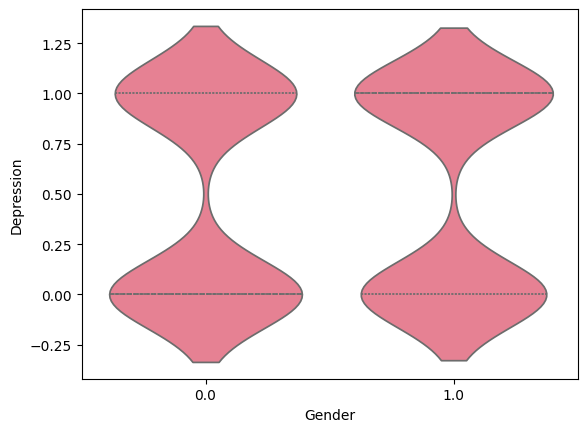

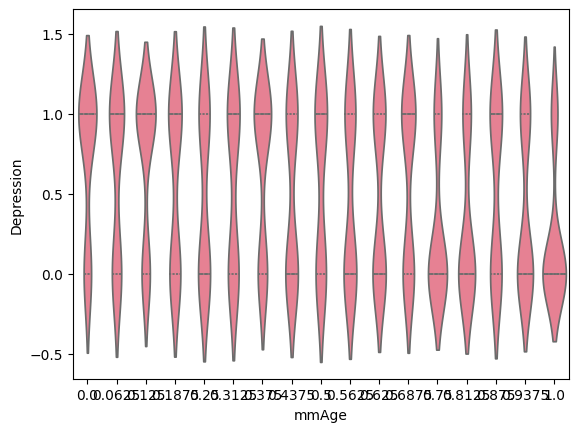

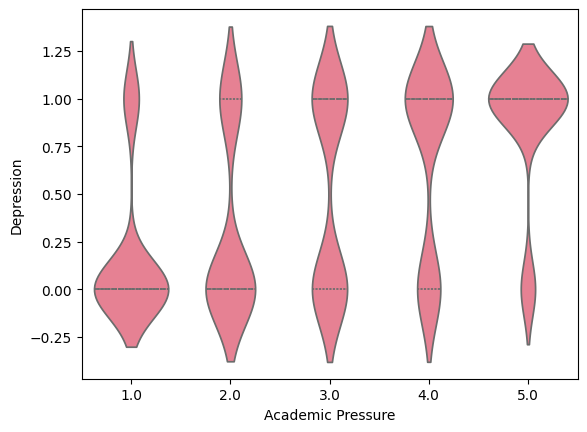

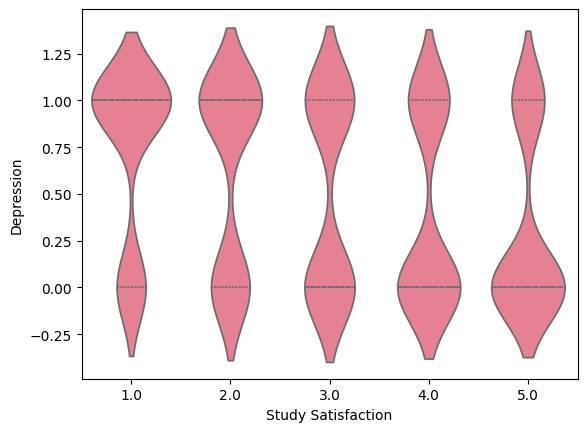

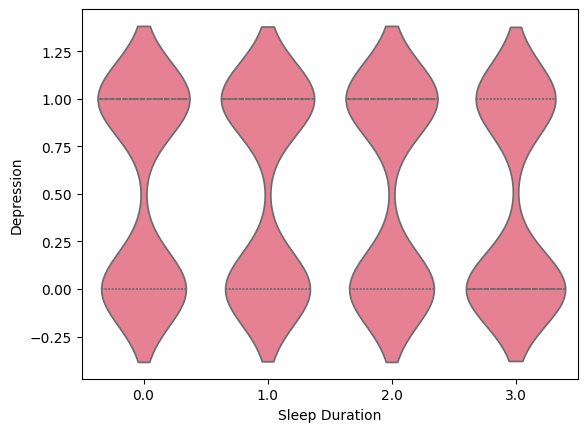

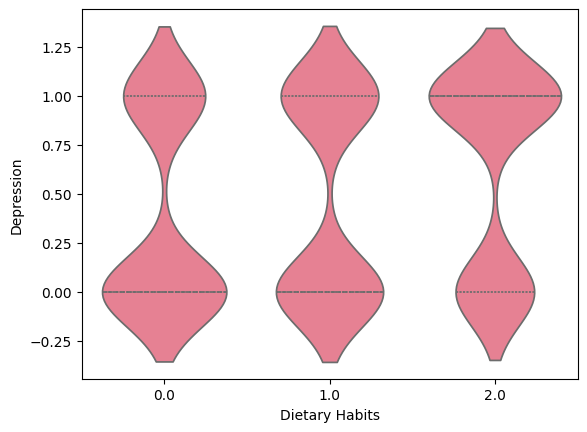

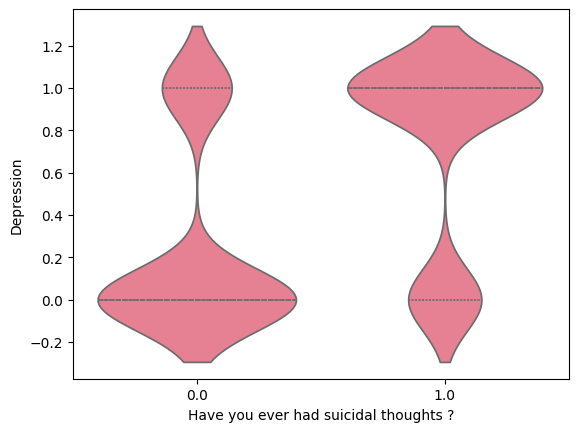

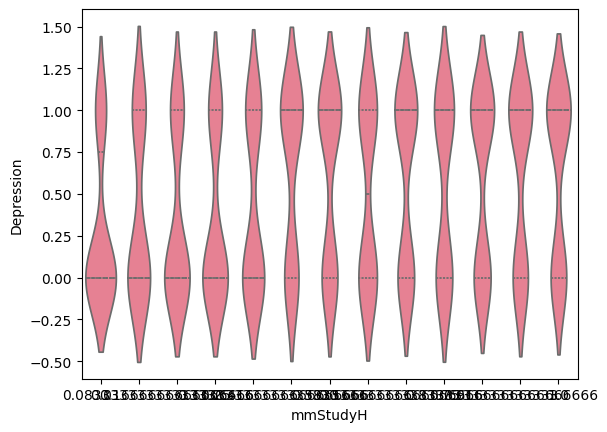

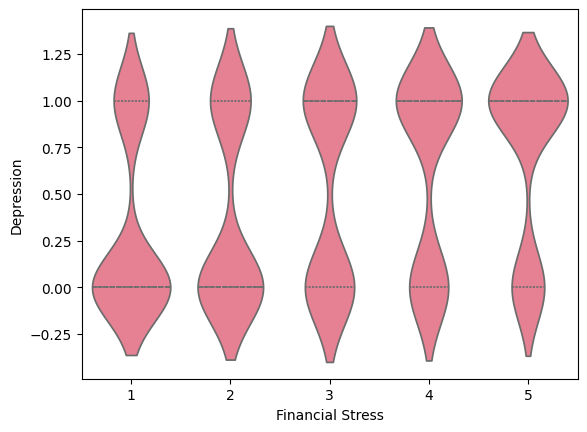

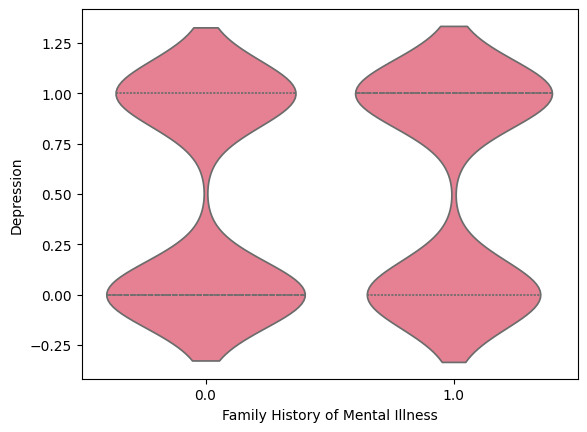

In [ ]:
# Скрипичный график.
# Используется для проверки сравнения распределения переменных:

sns.violinplot(y='Depression', x='Gender', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Depression', x='mmAge', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Depression', x='Academic Pressure', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Depression', x='Study Satisfaction', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Depression', x='Sleep Duration', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Depression', x='Dietary Habits', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Depression', x='Have you ever had suicidal thoughts ?', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Depression', x='mmStudyH', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Depression', x='Financial Stress', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Depression', x='Family History of Mental Illness', data=dataset, inner='quartile')
plt.show()

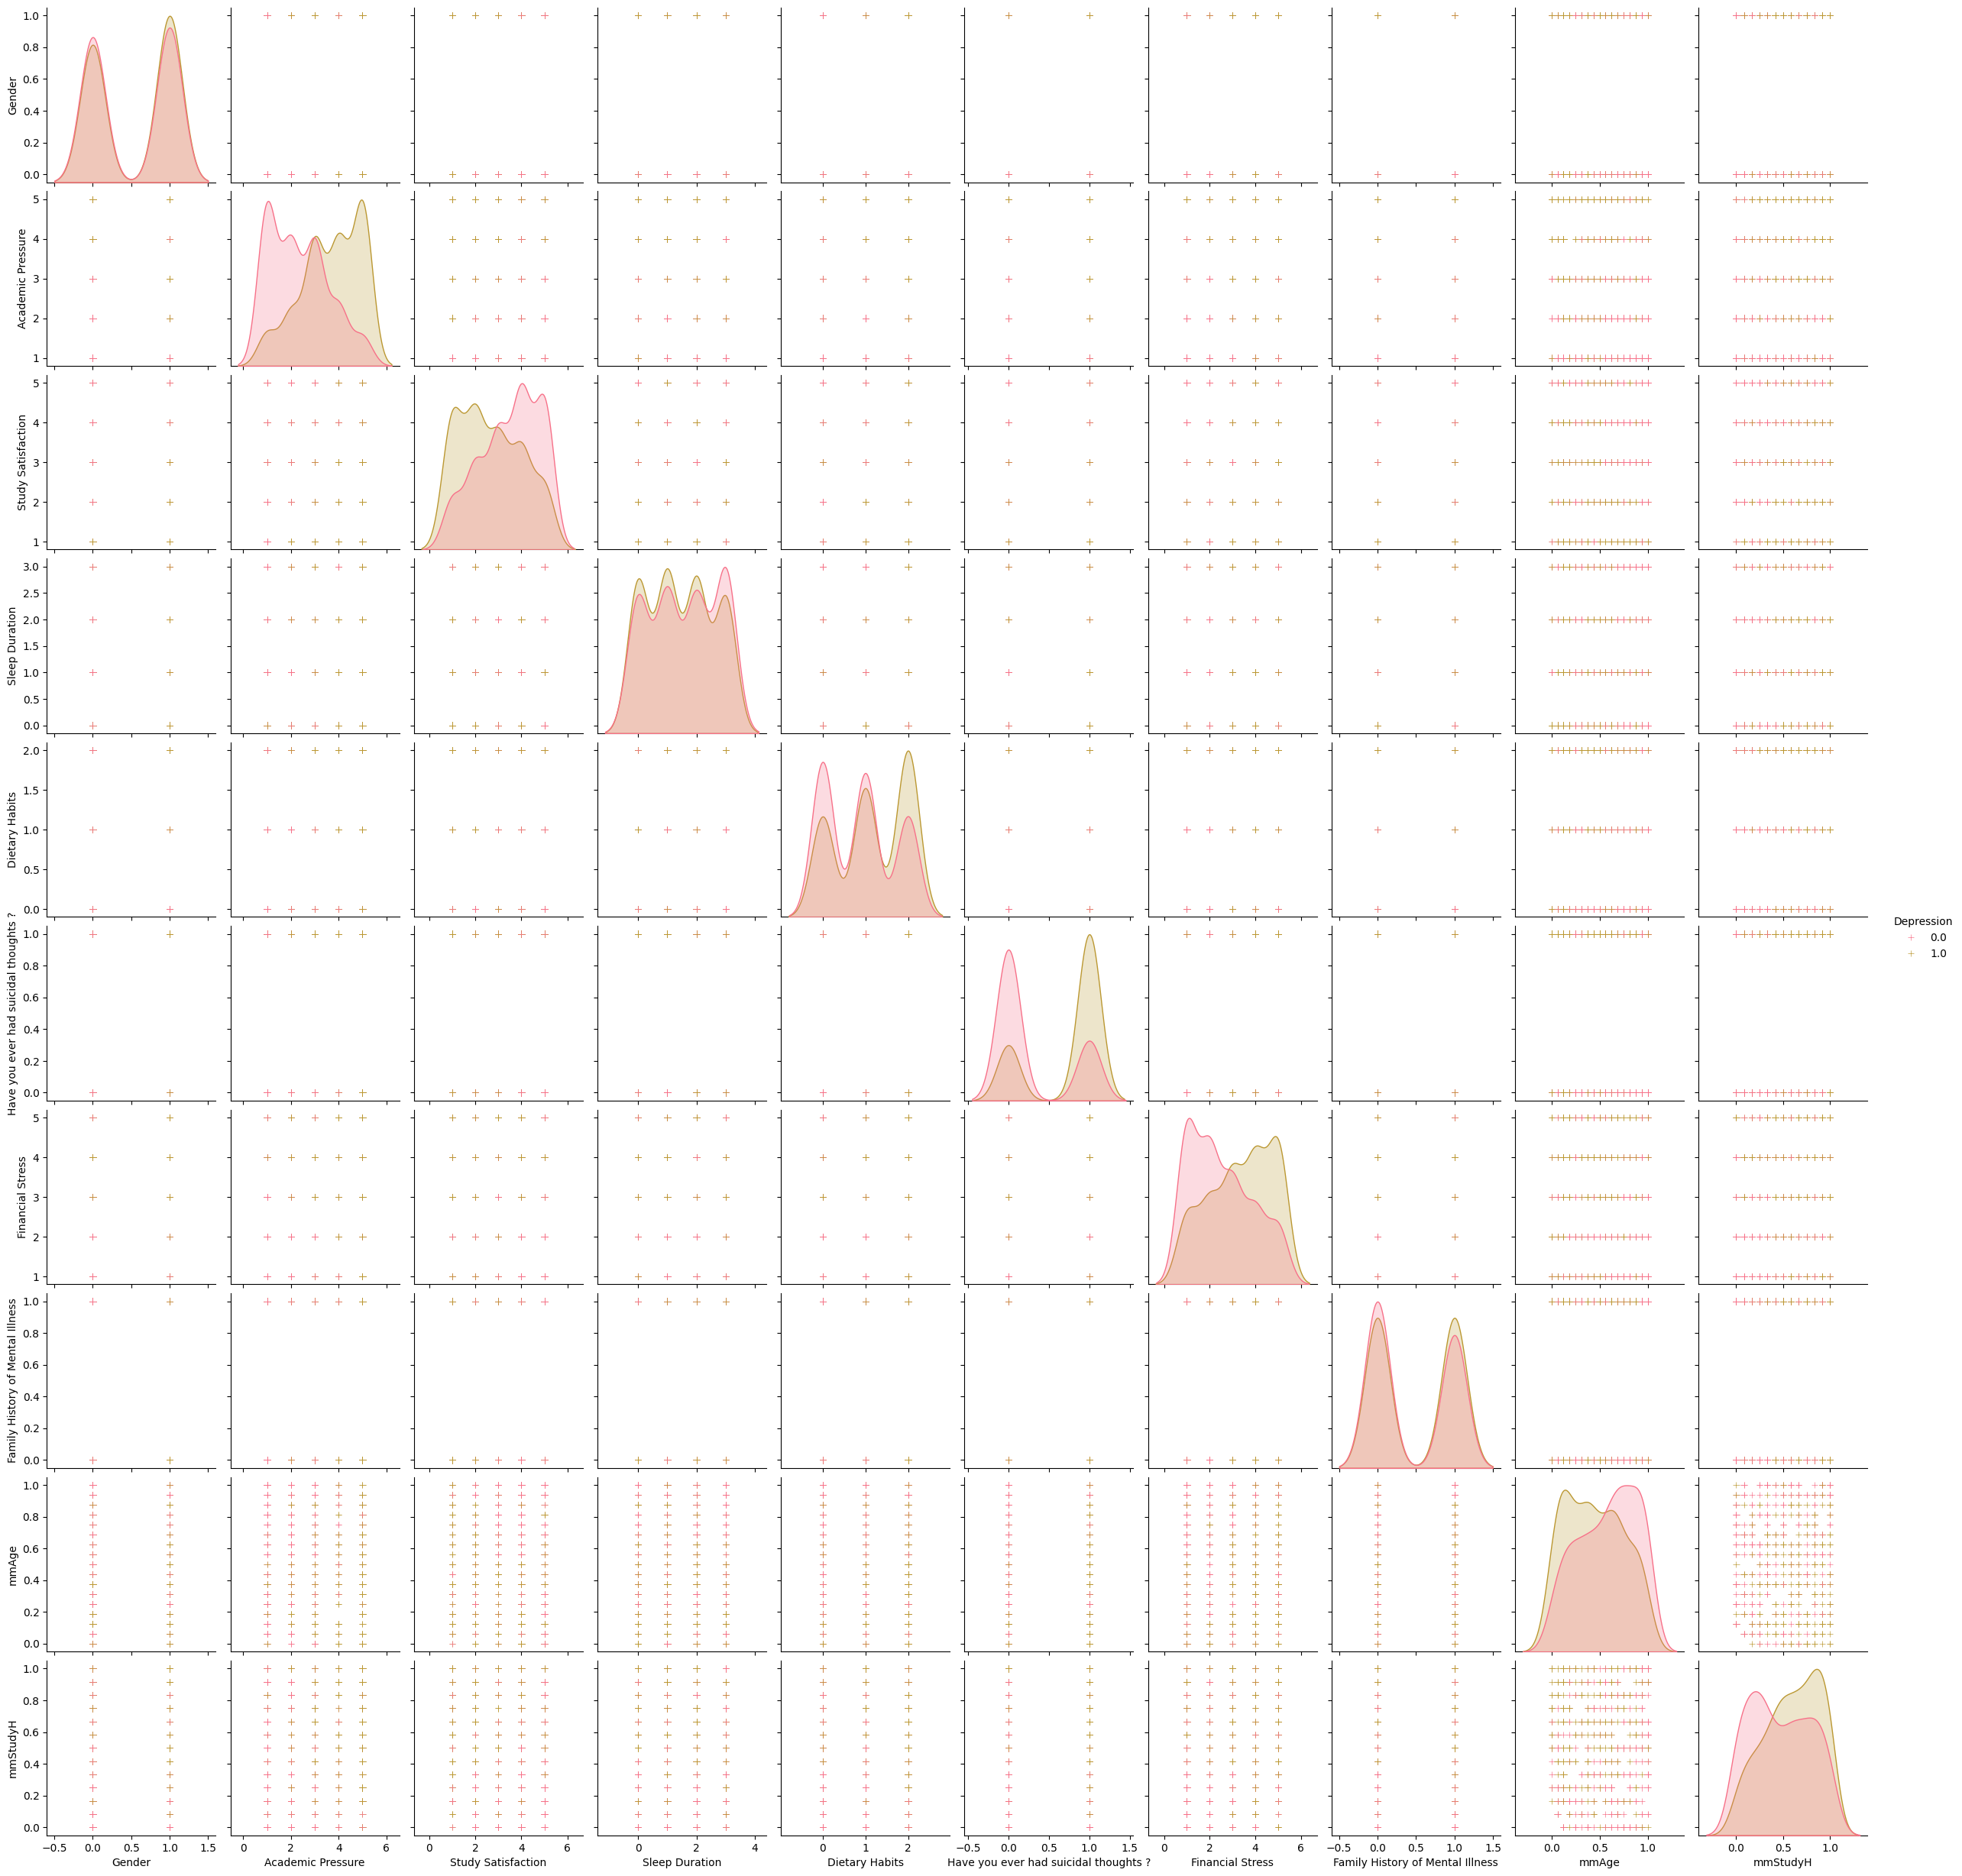

In [ ]:
# Парный график
#Построение нескольких попарных двумерных распределений в наборе данных с помощью pairplot:

sns.pairplot(dataset, hue='Depression', markers='+')
plt.show()

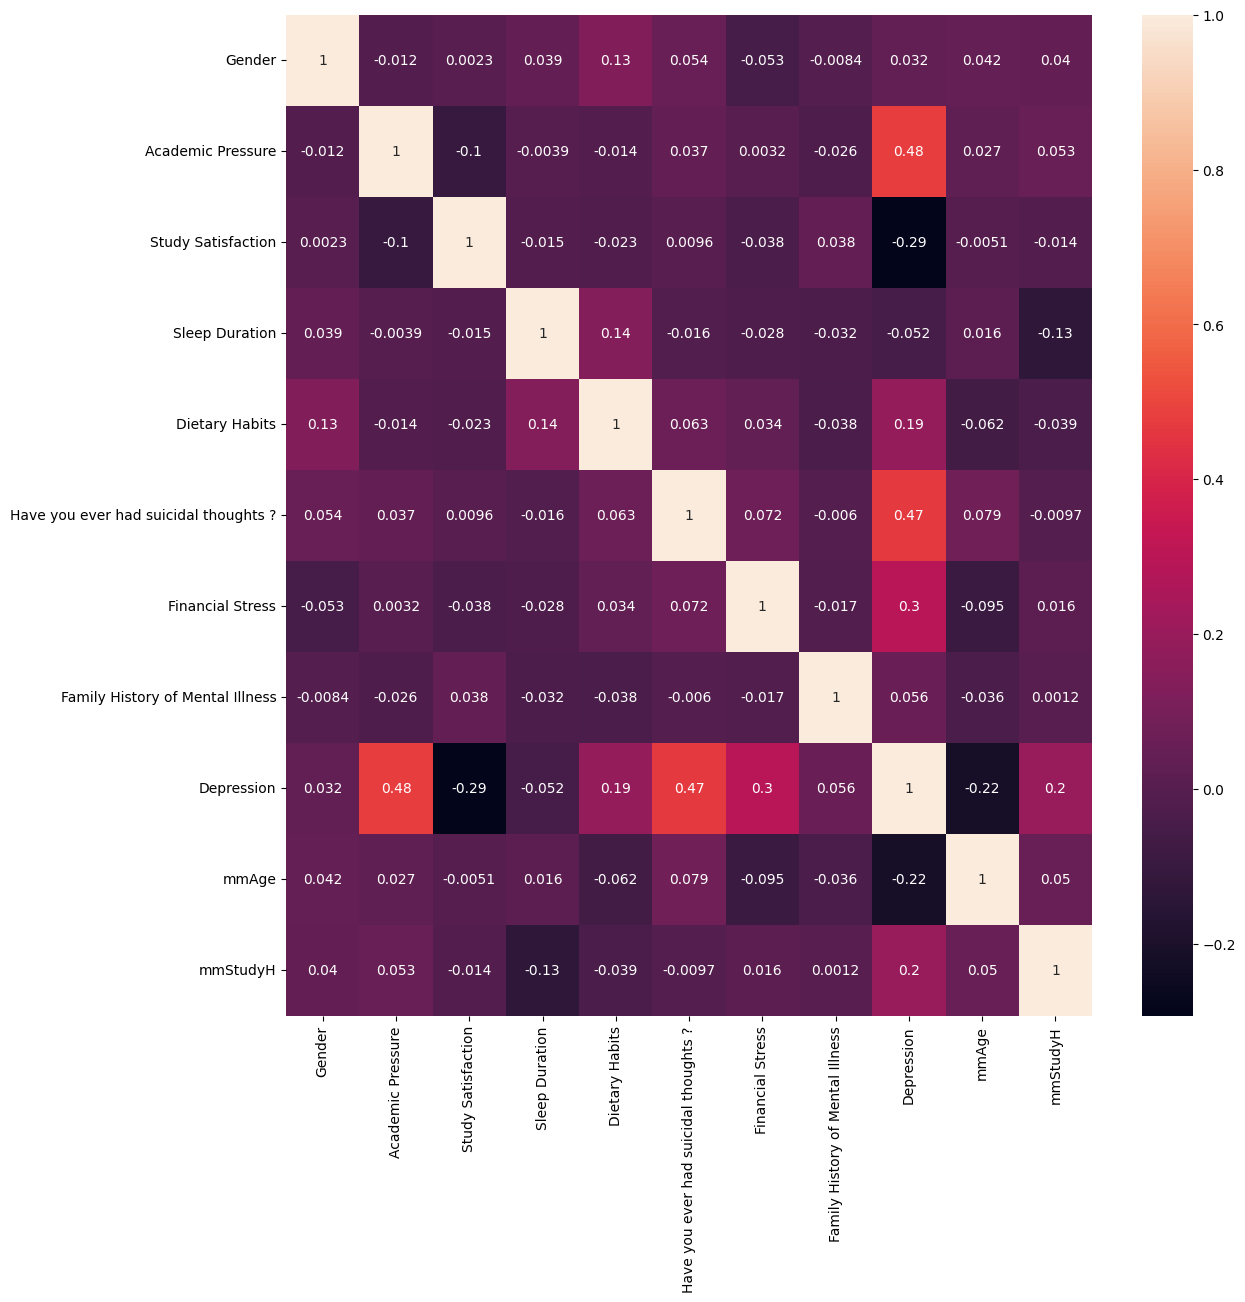

In [ ]:
# Тепловая карта
# Построение тепловой карты для проверки корреляции.
# dataset.corr() используется для поиска попарной корреляции всех столбцов в кадре данных.

plt.figure(figsize=(13,13))
sns.heatmap(dataset.corr(numeric_only = True), annot=True)
plt.show()

# Построение модели

## Разделение набора данных

Y  - целевая переменная, которую предсказываем. Мы ищем зависимость этой переменной от соответствующих фич.  В нашем случае это столбец Depression.

В X складываем весь набор данных без целевой переменной.

In [ ]:
X = dataset.drop(['Depression'], axis=1)
y = dataset['Depression']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (502, 10) | y shape: (502,) 


X имеет 502 строк и 12 столбца, тогда как Y имеет 502 строк и только один столбец.

## Train Test разделение

Разделяем наш набор данных на обучающий (train) и тестовый (test) с помощью train_test_split(), мы берем 80% данных для обучения нашей модели и 20% оставляем в качестве проверочного набора данных:

In [ ]:
import scipy.stats as stats

y_mapped = y.map({0: 0, 1: 1})

# почему важно перемешивать и делать train и test статистически не различимыми по целевой переменной
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.30, shuffle=False)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=0.34985998891926967, pvalue=0.7265910930806647, df=500.0)

## Обучение и выбор оптимальной модели

Далее попробуем следующие алгоритмы:

Logistic Regression (LR) </br>
Linear Discriminant Analysis (LDA)</br>
K-Nearest Neighbors (KNN)</br>
Classification and Regression Trees (CART)</br>
Gaussian Naive Bayes (NB)</br>
Support Vector Machines (SVM)</br>

In [ ]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.940317 (0.046501)
LDA: 0.951587 (0.042445)
KNN: 0.806190 (0.066327)
CART: 0.820397 (0.061597)
NB: 0.920397 (0.041410)
SVC: 0.874683 (0.054399)


LinearDiscriminantAnalysis классификатор показал лучшие метрики среди всех алгоритмов.
Далее работаем с LinearDiscriminantAnalysis.

## Обучение конкретной модели
Определяем нашу модель LDA
После этого подгоняем/обучаем модель на X_train и Y_train с помощью метода .fit().
Затем мы делаем прогноз на X_test с помощью метода .predict().

In [ ]:
sk_lda = LinearDiscriminantAnalysis(solver='eigen')
sk_lda.fit(X_train, y_train)
sk_lda_pred_res = sk_lda.predict(X_test)
sk_transformed = sk_lda.transform(X_train)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)

print(f'sk LDA accuracy: {sk_lda_accuracy}')
print(f'sk LDA prediction: {sk_lda_pred_res}')
print('sk transformed features', sk_transformed[:5].T, sep='\n')

sk LDA accuracy: 0.9801324503311258
sk LDA prediction: [0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1
 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1
 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1
 0 0 1]
sk transformed features
[[-2.65206966 -2.84798043 -3.54458471 -2.50820973 -0.39992005]]


## Визуализация решения

<Axes: >

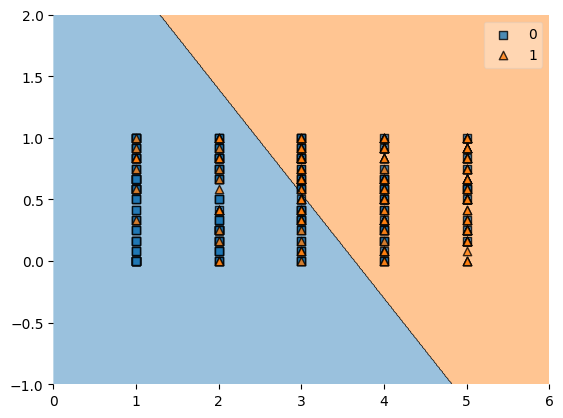

In [ ]:
from mlxtend.plotting import plot_decision_regions

# Создадим целевой вектор y_2d
# Преобразуем классы к классам 0, 1, 2 соответственно
#y_s = y_train.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
X_2d= X_train[['Academic Pressure', 'mmStudyH']].values
y_2d = y_train.values
sk_lda1 = LinearDiscriminantAnalysis(solver='eigen')
sk_lda1.fit(X_2d, y_2d)
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)

<Axes: >

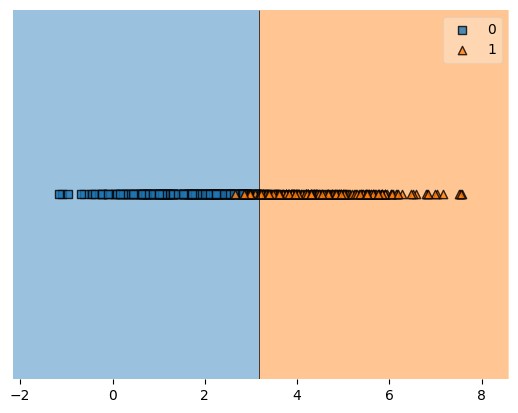

In [ ]:
df = dataset["Depression"].map({0: 0, 1: 1})

Xs = dataset[['Academic Pressure', 'mmStudyH']]
ys = df.values

sk_lda2 = LinearDiscriminantAnalysis(solver='eigen')
X1_lda = sk_lda2.fit(X, ys).transform(X)

Xs = X1_lda

X1_lda_train, X1_lda_test, y1_train, y1_test = train_test_split(X1_lda, ys, random_state=0)

sk_lda2.fit(X1_lda_train, y1_train)


plot_decision_regions(X=X1_lda, y=ys, clf=sk_lda2)

In [ ]:
predicted = sk_lda2.predict(X1_lda_test)

In [ ]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

## Accuray e AUC
accuracy = metrics.accuracy_score(y1_test, predicted)#Оценим точность классификации.
## Precision e Recall
recall = metrics.recall_score(y1_test, predicted, average="weighted")
precision = metrics.precision_score(y1_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y1_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Recall (all 1s predicted right): 0.96
Precision (confidence when predicting a 1): 0.96
Detail:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        62
           1       0.95      0.97      0.96        64

    accuracy                           0.96       126
   macro avg       0.96      0.96      0.96       126
weighted avg       0.96      0.96      0.96       126



Результаты показывают, что модель работает очень хорошо на тестовом наборе данных, достигая общей точности 96%.

1. Accuracy: 0.96
Точность (accuracy) = 0.96 означает, что модель правильно предсказала 96% всех объектов из тестового набора данных.
Из 126 примеров модель допустила ошибку лишь для небольшого количества объектов.
2. Recall (all 1s predicted right): 0.96
Полнота (recall) измеряет, насколько хорошо модель находит все объекты каждого класса:
Для класса 0 Recall = 0.95 → 95% всех объектов класса 0 были правильно найдены.
Для класса 1 Recall = 0.97 → 97% всех объектов класса 1 были правильно найдены.
Это значит, что модель почти не пропустила объекты обоих классов.
3. Precision (confidence when predicting a 1): 0.96
Точность (precision) показывает, насколько предсказанные классы совпадают с реальными:
Для класса 0 Precision = 0.97 → Если модель предсказывает класс 0, то в 97% случаев это правильно.
Для класса 1 Precision = 0.95 → Если модель предсказывает класс 1, то в 95% случаев это правильно.
Модель делает уверенные и почти безошибочные предсказания для обоих классов.
4. Classification Report:

F1-score:
Для обоих классов 0 и 1 F1-score = 0.96, что говорит о сбалансированности предсказаний.
Support:

Количество объектов в тестовом наборе для каждого класса:
Класс 0 - 62 объекта.
Класс 1 - 64 объекта.

Macro avg: Средние значения Precision и Recall по обоим классам без учета размера классов.
Macro avg = 0.96.

Weighted avg: Усреднённое значение Precision, Recall и F1-score с учётом размера каждого класса.
Поскольку оба класса представлены почти равномерно, weighted avg также равно 0.96.

Итог:
Результаты показывают, что модель работает очень эффективно на этом тестовом наборе данных